# 🪹 Nested Statements and Scope in Python

When you create a variable in Python, it is stored in a **namespace**, and every variable also has a **scope**—which defines where that variable can be accessed in your code.

Python uses a **hierarchy of scopes** that follows the **LEGB Rule**:

* **L**: Local — Names defined inside a function.
* **E**: Enclosing — Names in the local scope of enclosing functions.
* **G**: Global — Names assigned at the top level of a script or module.
* **B**: Built-in — Names built into Python (e.g., `len`, `sum`).

Nested functions—functions defined inside other functions—are an important use case where understanding scope is essential. Python provides keywords like `global` and `nonlocal` to explicitly declare how variables are accessed and modified in different scopes.




<div style="text-align: center;">
  <a href="https://colab.research.google.com/github/MinooSdpr/python-for-beginners/blob/main/Session%2015/Session%2015_1%20-%20Nested%20Statements%20and%20Scope.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" />
  </a>
  &nbsp;
  <a href="https://github.com/MinooSdpr/python-for-beginners/blob/main/Session%2015/Session%2015_1%20-%20Nested%20Statements%20and%20Scope.ipynb">
    <img src="https://img.shields.io/badge/Open%20in-GitHub-24292e?logo=github&logoColor=white" alt="Open In GitHub" />
  </a>
</div>

---
In the examples below, we’ll explore how nested functions interact with variable scope using both `nonlocal` and `global`.


In [1]:
x = 25

def printer():
    b = 50
    return b


What do you imagine the output of printer() is? 25 or 50? What is the output of print x? 25 or 50?

In [2]:
print(printer())

50


This is where the idea of scope comes in. Python has a set of rules it follows to decide what variables (such as **x** in this case) you are referencing in your code.


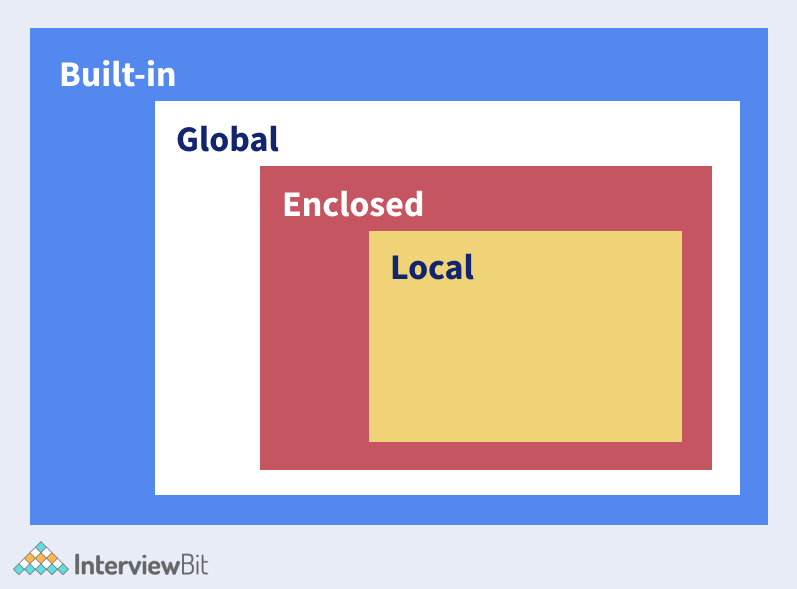

## Quick examples of LEGB

### Local

In [3]:
def calculate_discounted_price(original_price, discount_percent):
    discount = original_price * (discount_percent / 100)
    final_price = original_price - discount
    return final_price

price = 100
discount = 20

print(f"Original price: ${price}")
print(f"Discounted price: ${calculate_discounted_price(price, discount)}")


Original price: $100
Discounted price: $80.0


### Enclosing function locals
This occurs when we have a function inside a function (nested functions)


In [4]:
name = 'This is a global name'

def greet():
    # Enclosing function
    name = 'Sammy'
    #print(name)
    def hello():
        print('Hello '+name)
    
    hello()

greet()
print(name)

Hello Sammy
This is a global name


Note how Sammy was used, because the hello() function was enclosed inside of the greet function!

### Global

In [5]:
print(name)

This is a global name


### Built-in
These are the built-in function names in Python

In [6]:
len

<function len(obj, /)>

## 🔹 Local Variables

Variables declared **inside a function** are called **local variables**. These variables are **independent** of any variables with the same name outside the function—they exist only within the function where they are defined.

This behavior is due to **scope**: the region of code where a variable name is recognized. A local variable’s scope begins at the point where it is defined and ends when the function completes.

Even if a variable outside the function shares the same name, the local one takes precedence **within** the function block.


In [7]:
x = 50

def func(x):
    print('x is', x)
    x = 2
    print('Changed local x to', x)

func(x)
print('x is still', x)

x is 50
Changed local x to 2
x is still 50


The first time that we print the value of the name **x** with the first line in the function’s body, Python uses the value of the parameter declared in the main block, above the function definition.

Next, we assign the value 2 to **x**. The name **x** is local to our function. So, when we change the value of **x** in the function, the **x** defined in the main block remains unaffected.

With the last print statement, we display the value of **x** as defined in the main block, thereby confirming that it is actually unaffected by the local assignment within the previously called function.

## 🌍 The `global` Statement

If you want to **modify a variable defined at the top level** of your program (outside any function), you must explicitly declare it as `global` within the function. This tells Python that you're referring to the global version of the variable, **not creating a new local one**.

Without the `global` statement, assigning a value to a variable inside a function will always create a **local** variable—even if a global variable with the same name already exists.

You **can** read the value of a global variable inside a function without using `global`—as long as you don’t try to assign to it. However, this practice is discouraged because it can make your code harder to understand. Using the `global` keyword makes your intent clear: you're working with a variable defined in the **global scope**.


In [8]:

x=0
def func():
    global x
    print('This function is now using the global x!')
    print('Because of global x is: ', x)
    x = 2
    print('Ran func(), changed global x to', x)

print('Before calling func(), x is: ', x)
func()
print('Value of x (outside of func()) is: ', x)

Before calling func(), x is:  0
This function is now using the global x!
Because of global x is:  0
Ran func(), changed global x to 2
Value of x (outside of func()) is:  2


The `global` statement is used to declare that **x** is a global variable - hence, when we assign a value to **x** inside the function, that change is reflected when we use the value of **x** in the main block.

You can specify more than one global variable using the same global statement e.g. `global x, y, z`.

## 🔁 `nonlocal` Keyword

The `nonlocal` keyword is used in **nested functions** to indicate that a variable refers to the **nearest enclosing scope** (not the local or global scope).

By default, assigning to a variable inside a function creates a **new local variable**. But if you want to **modify** a variable defined in an **outer (but non-global)** function, you must declare it as `nonlocal`.

This is especially useful when building closures or stateful inner functions, where the inner function needs to update a variable from its enclosing (outer) function.


In [9]:
def outer_function():
    x = 10
    
    def inner_function():
        nonlocal x
        x += 5
        print('Inner Function:', x)
    
    inner_function()
    print('Outer Function:', x)

outer_function()


Inner Function: 15
Outer Function: 15


In [10]:
def counter():
    count = 0
    
    def increment():
        nonlocal count
        count += 1
        return count
    
    return increment

# Create a counter function using closure
counter_func = counter()

print(counter_func())  # Output: 1
print(counter_func())  # Output: 2
print(counter_func())  # Output: 3


1
2
3


## 🔍 Other Scope-Related Concepts

While `global` and `nonlocal` are the only keywords that *declare* scope behavior, there are several **built-in functions, constructs, or patterns** that are closely **related to scope**, even if they're not keywords:

#### 📌 Built-in Functions:

* `locals()` — returns a dictionary of the current local symbol table.
* `globals()` — returns a dictionary of the global symbol table.
* `vars()` — returns `__dict__` attribute of objects/modules (related to namespaces).


<div style="float:right;">
  <a href="https://github.com/MinooSdpr/python-for-beginners/blob/main/Session%2008/Session%2008_1%20-%20Sets%20and%20Booleans.ipynb"
     style="
       display:inline-block;
       padding:8px 20px;
       background-color:#414f6f;
       color:white;
       border-radius:12px;
       text-decoration:none;
       font-family:sans-serif;
       transition:background-color 0.3s ease;
     "
     onmouseover="this.style.backgroundColor='#2f3a52';"
     onmouseout="this.style.backgroundColor='#414f6f';">
    ▶️ Next
  </a>
</div>